# Machine Learning Assignment 2 - Task 2: Support Vector Machines (SVM)
## Classification on Iris Dataset

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score
import warnings
warnings.filterwarnings('ignore')

# Load iris dataset from sklearn
iris = datasets.load_iris()
X = iris.data  # Features: sepal length, sepal width, petal length, petal width
y = iris.target  # Target: species (setosa, versicolor, virginica)

# Create DataFrame for better visualization
df = pd.DataFrame(X, columns=iris.feature_names)
df['species'] = iris.target
df['species_name'] = df['species'].map({0: 'setosa', 1: 'versicolor', 2: 'virginica'})

print("\n1. DATASET OVERVIEW")
print("-" * 30)
print(f"Dataset shape: {df.shape}")
print(f"Number of features: {X.shape[1]}")
print(f"Number of classes: {len(np.unique(y))}")
print(f"Class names: {iris.target_names}")
print(f"Feature names: {iris.feature_names}")


1. DATASET OVERVIEW
------------------------------
Dataset shape: (150, 6)
Number of features: 4
Number of classes: 3
Class names: ['setosa' 'versicolor' 'virginica']
Feature names: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [6]:
# Display first few rows
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species,species_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [13]:
# Check for missing values
print("Missing values per column:")
df.isnull().sum()


Missing values per column:


sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
species              0
species_name         0
dtype: int64

In [18]:
# Basic statistics
print("\nDataset statistics:")
df.describe()


Dataset statistics:


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [20]:
# Class distribution
print("\nClass distribution:")
print(df['species_name'].value_counts())


Class distribution:
species_name
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64


# Visualizations

<function matplotlib.pyplot.show(close=None, block=None)>

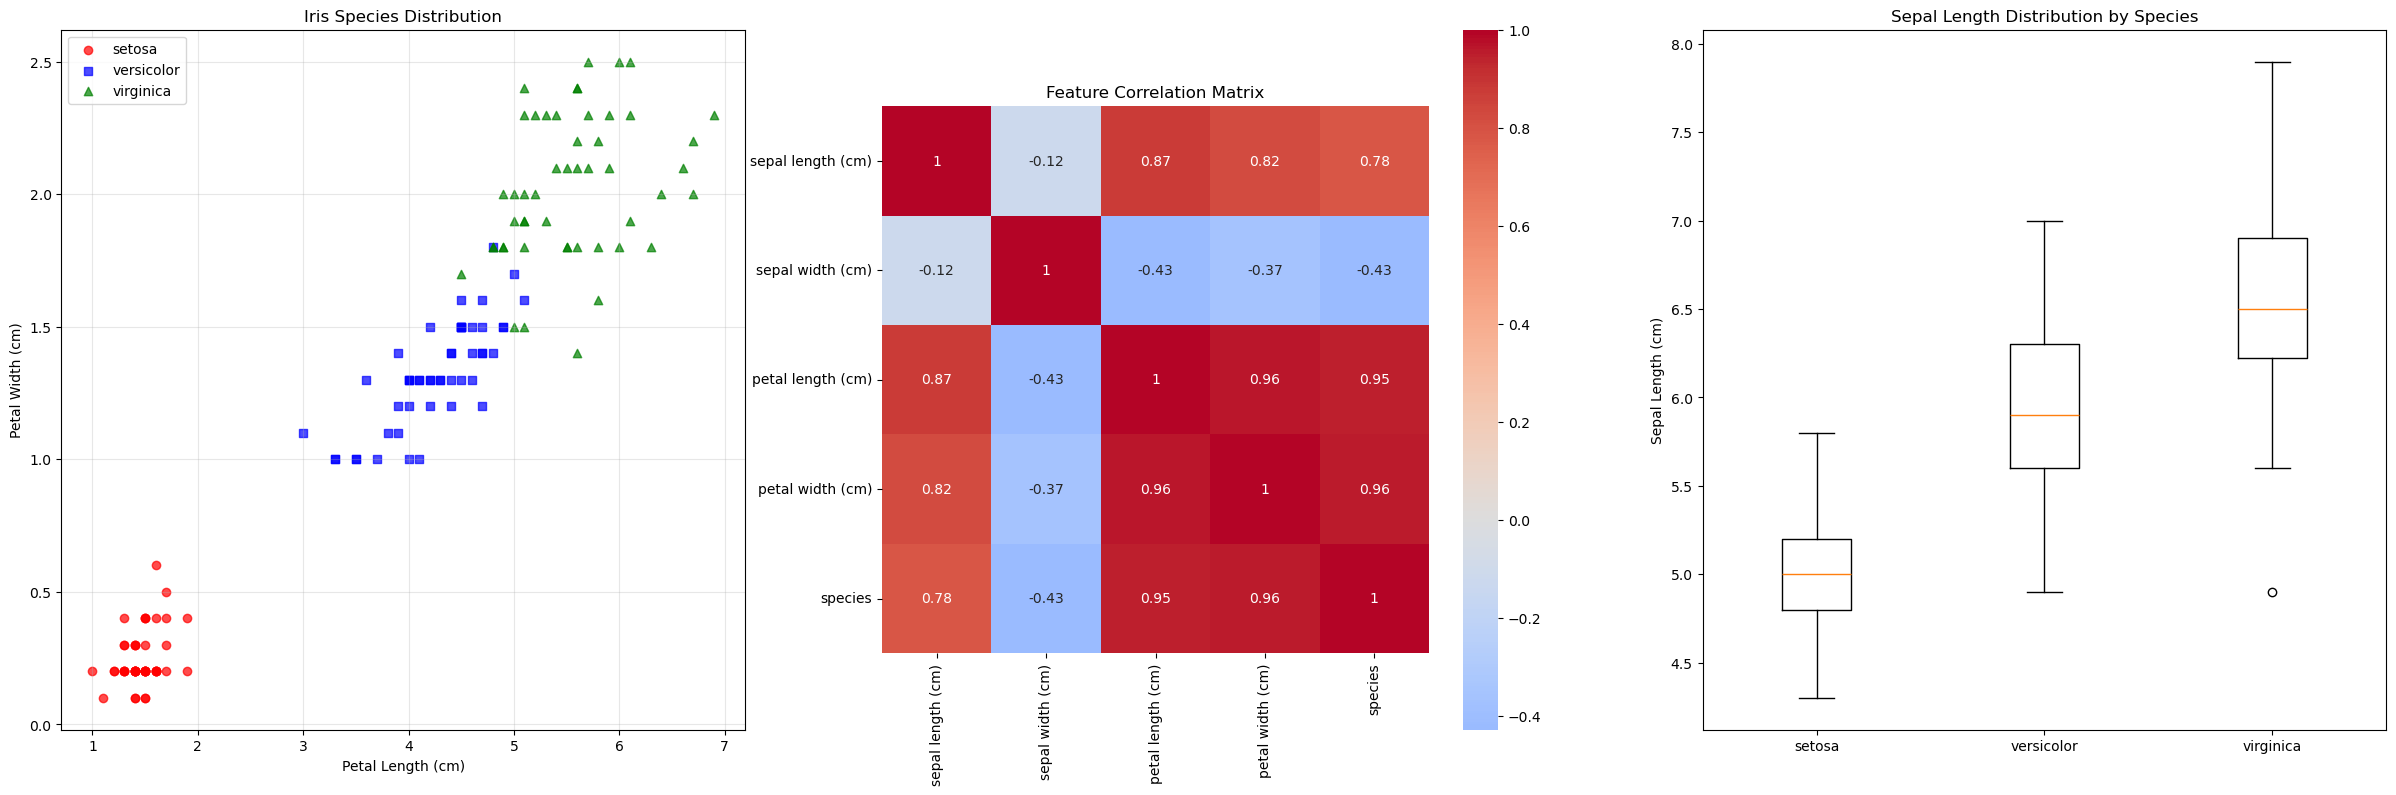

In [79]:
plt.figure(figsize=(30, 20))
# Subplot 1: Pairplot
plt.subplot(2, 3, 1)
# Create a simple scatter plot for two most important features
plt.scatter(df[df['species']==0]['petal length (cm)'], df[df['species']==0]['petal width (cm)'], 
           c='red', marker='o', label='setosa', alpha=0.7)
plt.scatter(df[df['species']==1]['petal length (cm)'], df[df['species']==1]['petal width (cm)'], 
           c='blue', marker='s', label='versicolor', alpha=0.7)
plt.scatter(df[df['species']==2]['petal length (cm)'], df[df['species']==2]['petal width (cm)'], 
           c='green', marker='^', label='virginica', alpha=0.7)
plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')
plt.title('Iris Species Distribution')
plt.legend()
plt.grid(True, alpha=0.3)

# Subplot 2: Feature correlation heatmap
plt.subplot(2, 3, 2)
correlation_matrix = df.select_dtypes(include=[np.number]).corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, square=True)
plt.title('Feature Correlation Matrix')

# Subplot 3: Box plot for each feature
plt.subplot(2, 3, 3)
feature_data = [df[df['species']==i]['sepal length (cm)'].values for i in range(3)]
plt.boxplot(feature_data, labels=iris.target_names)
plt.ylabel('Sepal Length (cm)')
plt.title('Sepal Length Distribution by Species')

plt.show

# 3. Data Preprocessing  

In [82]:
# Check data types
print("Data types:")
print(df.dtypes)


Data types:
sepal length (cm)    float64
sepal width (cm)     float64
petal length (cm)    float64
petal width (cm)     float64
species                int64
species_name          object
dtype: object


In [84]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

print(f"Training set size: {X_train.shape[0]} samples")
print(f"Testing set size: {X_test.shape[0]} samples")
print(f"Training set class distribution: {np.bincount(y_train)}")
print(f"Testing set class distribution: {np.bincount(y_test)}")

Training set size: 105 samples
Testing set size: 45 samples
Training set class distribution: [35 35 35]
Testing set class distribution: [15 15 15]


In [86]:
# Feature scaling (standardization)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("\nFeature scaling applied (StandardScaler)")
print("Original feature ranges:")
print(f"Sepal Length: [{X_train[:, 0].min():.2f}, {X_train[:, 0].max():.2f}]")
print(f"Sepal Width: [{X_train[:, 1].min():.2f}, {X_train[:, 1].max():.2f}]")
print(f"Petal Length: [{X_train[:, 2].min():.2f}, {X_train[:, 2].max():.2f}]")
print(f"Petal Width: [{X_train[:, 3].min():.2f}, {X_train[:, 3].max():.2f}]")

print("\nScaled feature ranges:")
print(f"Sepal Length: [{X_train_scaled[:, 0].min():.2f}, {X_train_scaled[:, 0].max():.2f}]")
print(f"Sepal Width: [{X_train_scaled[:, 1].min():.2f}, {X_train_scaled[:, 1].max():.2f}]")
print(f"Petal Length: [{X_train_scaled[:, 2].min():.2f}, {X_train_scaled[:, 2].max():.2f}]")
print(f"Petal Width: [{X_train_scaled[:, 3].min():.2f}, {X_train_scaled[:, 3].max():.2f}]")


Feature scaling applied (StandardScaler)
Original feature ranges:
Sepal Length: [4.30, 7.90]
Sepal Width: [2.00, 4.40]
Petal Length: [1.10, 6.90]
Petal Width: [0.10, 2.50]

Scaled feature ranges:
Sepal Length: [-1.83, 2.36]
Sepal Width: [-2.32, 2.96]
Petal Length: [-1.51, 1.75]
Petal Width: [-1.43, 1.67]


# 4. Build and Train SVM Models

In [89]:
# Try different SVM kernels
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
svm_models = {}
svm_scores = {}

print("Training SVM models with different kernels...")

for kernel in kernels:
    print(f"\nTraining SVM with {kernel} kernel...")
    
    # Create and train SVM model
    svm_model = SVC(kernel=kernel, random_state=42)
    svm_model.fit(X_train_scaled, y_train)
    
    # Make predictions
    y_pred = svm_model.predict(X_test_scaled)
    
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    
    # Store model and score
    svm_models[kernel] = svm_model
    svm_scores[kernel] = accuracy
    
    print(f"{kernel.capitalize()} kernel accuracy: {accuracy:.4f}")

Training SVM models with different kernels...

Training SVM with linear kernel...
Linear kernel accuracy: 0.9111

Training SVM with poly kernel...
Poly kernel accuracy: 0.8667

Training SVM with rbf kernel...
Rbf kernel accuracy: 0.9333

Training SVM with sigmoid kernel...
Sigmoid kernel accuracy: 0.9111


In [91]:
# Find best performing kernel
best_kernel = max(svm_scores, key=svm_scores.get)
print(f"\nBest performing kernel: {best_kernel} (Accuracy: {svm_scores[best_kernel]:.4f})")


Best performing kernel: rbf (Accuracy: 0.9333)


# 5. Hyperparameter Tuning

In [94]:
# Perform Grid Search for the best kernel
print(f"Performing Grid Search for {best_kernel} kernel...")

if best_kernel == 'linear':
    param_grid = {
        'C': [0.1, 1, 10, 100],
        'kernel': ['linear']
    }
elif best_kernel == 'rbf':
    param_grid = {
        'C': [0.1, 1, 10, 100],
        'gamma': ['scale', 'auto', 0.001, 0.01, 0.1, 1],
        'kernel': ['rbf']
    }
elif best_kernel == 'poly':
    param_grid = {
        'C': [0.1, 1, 10],
        'degree': [2, 3, 4],
        'gamma': ['scale', 'auto'],
        'kernel': ['poly']
    }
else:  # sigmoid
    param_grid = {
        'C': [0.1, 1, 10],
        'gamma': ['scale', 'auto', 0.01, 0.1],
        'kernel': ['sigmoid']
    }

# Grid search with cross-validation
grid_search = GridSearchCV(
    SVC(random_state=42), 
    param_grid, 
    cv=5, 
    scoring='accuracy',
    n_jobs=-1
)
grid_search.fit(X_train_scaled, y_train)

print("Grid Search Results:")
print(f"Best parameters: {grid_search.best_params_}")
print(f"Best cross-validation score: {grid_search.best_score_:.4f}")

Performing Grid Search for rbf kernel...
Grid Search Results:
Best parameters: {'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}
Best cross-validation score: 0.9810


In [96]:
# Train final model with best parameters
best_svm = grid_search.best_estimator_
final_predictions = best_svm.predict(X_test_scaled)

# Calculate various metrics
final_accuracy = accuracy_score(y_test, final_predictions)
precision = precision_score(y_test, final_predictions, average='weighted')
recall = recall_score(y_test, final_predictions, average='weighted')
f1 = f1_score(y_test, final_predictions, average='weighted')

print("Final Model Performance:")
print(f"Accuracy: {final_accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

Final Model Performance:
Accuracy: 0.9111
Precision: 0.9155
Recall: 0.9111
F1-Score: 0.9107


In [98]:
# Detailed classification report
print("\nDetailed Classification Report:")
print(classification_report(y_test, final_predictions, target_names=iris.target_names))


Detailed Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       0.82      0.93      0.88        15
   virginica       0.92      0.80      0.86        15

    accuracy                           0.91        45
   macro avg       0.92      0.91      0.91        45
weighted avg       0.92      0.91      0.91        45



In [104]:
# Confusion Matrix
print("\nConfusion Matrix:")
cm = confusion_matrix(y_test, final_predictions)
print(cm)


Confusion Matrix:
[[15  0  0]
 [ 0 14  1]
 [ 0  3 12]]


In [106]:
# Cross-validation scores
cv_scores = cross_val_score(best_svm, X_train_scaled, y_train, cv=5)
print(f"\nCross-validation scores: {cv_scores}")
print(f"Mean CV accuracy: {cv_scores.mean():.4f} (+/- {cv_scores.std() * 2:.4f})")


Cross-validation scores: [0.95238095 0.95238095 1.         1.         1.        ]
Mean CV accuracy: 0.9810 (+/- 0.0467)


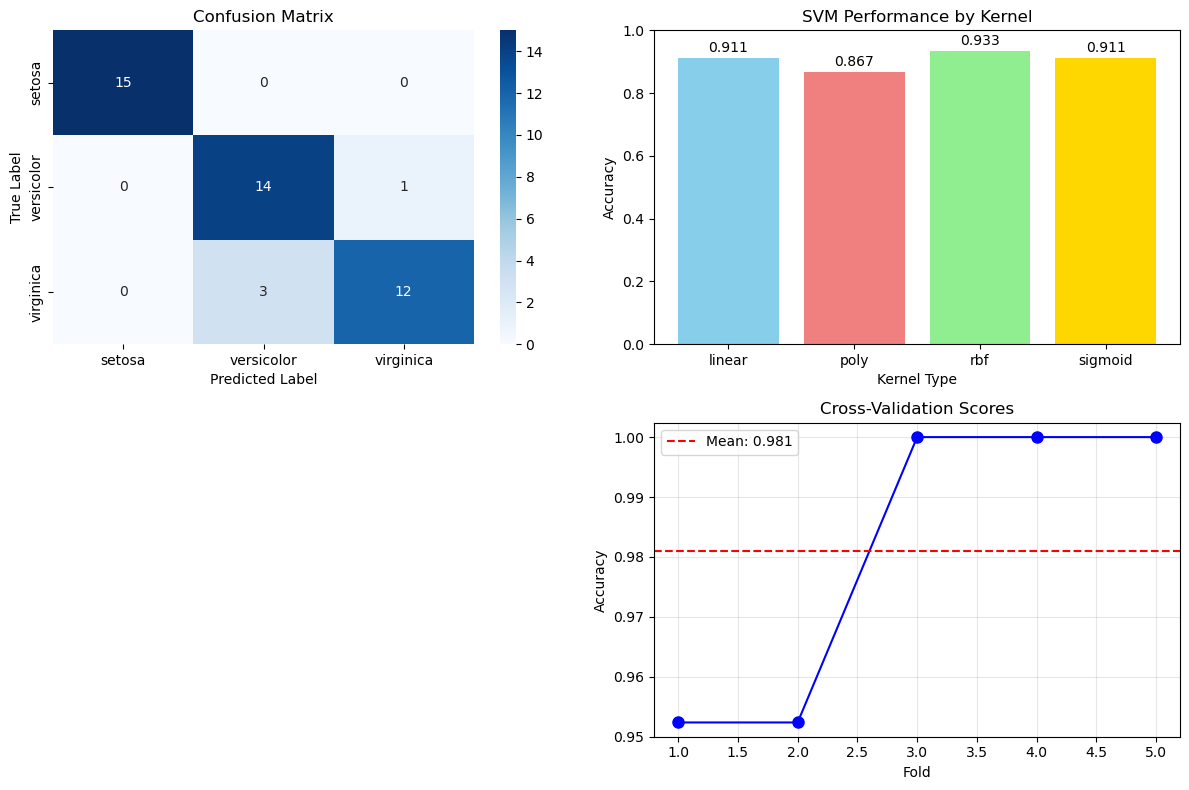

In [108]:
# Visualize results
plt.figure(figsize=(12, 8))

# Confusion Matrix Heatmap
plt.subplot(2, 2, 1)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')

# Performance comparison of different kernels
plt.subplot(2, 2, 2)
kernels_list = list(svm_scores.keys())
scores_list = list(svm_scores.values())
bars = plt.bar(kernels_list, scores_list, color=['skyblue', 'lightcoral', 'lightgreen', 'gold'])
plt.title('SVM Performance by Kernel')
plt.ylabel('Accuracy')
plt.xlabel('Kernel Type')
plt.ylim(0, 1)
for bar, score in zip(bars, scores_list):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01, 
             f'{score:.3f}', ha='center', va='bottom')

# Feature importance visualization (for linear kernel)
if best_kernel == 'linear':
    plt.subplot(2, 2, 3)
    feature_importance = np.abs(best_svm.coef_[0])
    plt.bar(range(len(feature_importance)), feature_importance)
    plt.title('Feature Importance (Linear SVM)')
    plt.xlabel('Feature Index')
    plt.ylabel('Absolute Coefficient Value')
    plt.xticks(range(len(iris.feature_names)), 
               [name.split(' ')[0] + ' ' + name.split(' ')[1][0] for name in iris.feature_names], 
               rotation=45)

# Cross-validation scores
plt.subplot(2, 2, 4)
plt.plot(range(1, len(cv_scores) + 1), cv_scores, 'bo-', markersize=8)
plt.axhline(y=cv_scores.mean(), color='r', linestyle='--', 
            label=f'Mean: {cv_scores.mean():.3f}')
plt.title('Cross-Validation Scores')
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# 7. Summary and Conclusions

In [115]:
if final_accuracy >= 0.95:
    print("• Excellent model performance achieved")
elif final_accuracy >= 0.90:
    print("• Very good model performance")
else:
    print("• Good model performance with room for improvement")

print(f"• The {best_kernel} kernel performed best for this dataset")
print("• All classes were well separated in the feature space")
print("• The model shows consistent performance across cross-validation folds")


• Very good model performance
• The rbf kernel performed best for this dataset
• All classes were well separated in the feature space
• The model shows consistent performance across cross-validation folds
